In [ ]:
!conda install --file env.txt --yes

This example requires LAMMPS. You can install it from source or conda via `conda install -c conda-forge lammps`.
You also need to `pip install -e` the topology package after February 14, 2020, when PR #121 was merged.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import mbuild as mb
import topology as topo
from topology.external.convert_mbuild import from_mbuild
from topology.formats.lammpsdata import write_lammpsdata

In [3]:
# Generate a small box of Argon atoms using mBuild
ar = mb.Compound(name='Ar')

packed_system = mb.fill_box(
    compound=ar,
    n_compounds=329,
    box=mb.Box([2.5, 2.5, 2.5]),
)

packed_system.visualize()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [4]:
# Convert system to a backend object
top = from_mbuild(packed_system)

# Load force field from XML
ff = topo.ForceField('ar.xml')
ar_type = ff.atom_types['Ar']

# Manually set types, bypassing foyer or any atomtyping engine
for site in top.sites:
    site.atom_type = ar_type

top.update_topology()

# Save files to disk
write_lammpsdata(top, 'data.ar')

Next, we run the simulations (energy minimizaiton and then NVE MD) using LAMMPS

In [5]:
!/Users/raymatsumoto/installs/lammps-stable_5Jun2019/src/lmp_serial < in.argon

LAMMPS (5 Jun 2019)
Reading data file ...
  orthogonal box = (0 0 0) to (25 25 25)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  329 atoms
Finding 1-2 1-3 1-4 neighbors ...
  special bond factors lj:   0          0          0         
  special bond factors coul: 0          0          0         
  0 = max # of 1-2 neighbors
  0 = max # of 1-3 neighbors
  0 = max # of 1-4 neighbors
  1 = max # of special neighbors
  special bonds CPU = 0.000101089 secs
  read_data CPU = 0.00132799 secs
Neighbor list info ...
  update every 1 steps, delay 10 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 3.2
  ghost atom cutoff = 3.2
  binsize = 1.6, bins = 16 16 16
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair lj/cut, perpetual
      attributes: half, newton on
      pair build: half/bin/newton
      stencil: half/bin/3d/newton
      bin: standard
Setting up Verlet run ...
  Unit style    : real
  Current step  : 0
  Time step 

Finally we can use use `numpy` and `matplotlib` to do some quick checks of the properties of the system

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [19]:
data = np.loadtxt('thermo.txt')

Text(0, 0.5, 'Temperature (K)')

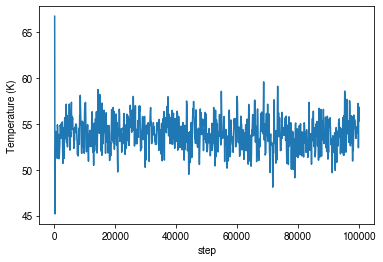

In [20]:
plt.plot(data[:,0], data[:,1])
plt.xlabel('step')
plt.ylabel('Temperature (K)')

Text(0, 0.5, 'Potential Energy (kcal/mol)')

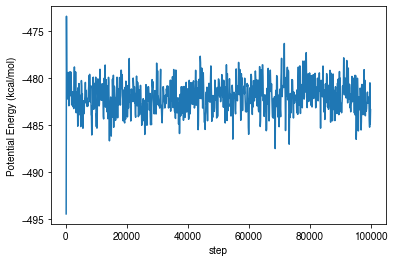

In [21]:
plt.plot(data[:,0], data[:,2])
plt.xlabel('step')
plt.ylabel('Potential Energy (kcal/mol)')